In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
import numpy as np
from sklearn.neighbors import NearestNeighbors

Impotieren der Daten

In [70]:
df = pd.read_excel("Erdbeerfelder.xlsx", sheet_name=1, skiprows=1, usecols="C:D",names=["x","y"])
df = df.astype(float)

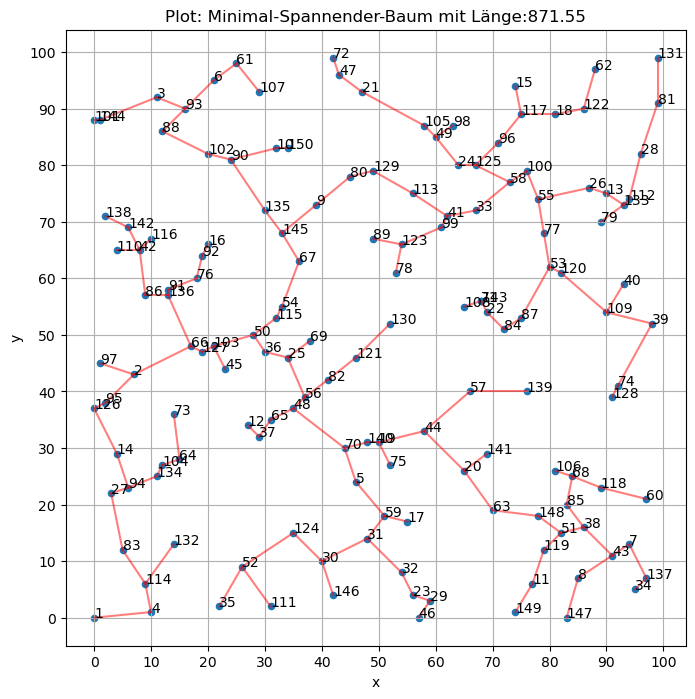

In [71]:
plot_minimum_spanning_tree(np.array(df.index),[])

**Idee: Entferne längste Kannte im MST**<br>

In [72]:
Graph=dataframe_to_Graph(df)

def student_competition_solver(Graph):
    # Berechnung des minimalen Spannbaums f
    T = nx.minimum_spanning_tree(Graph)

    # Suche die längste Kante
    longest_edge = max(T.edges(data=True), key=lambda x: x[2]['weight'])
    source_node, target_node, edge_attributes = longest_edge

    # Entferne die längste Kante
    T.remove_edge(source_node, target_node)

    # Teile den Graphen in zwei neue Bäume auf
    cut = list(nx.connected_components(T))

    # Knoten des ersten Baums 
    MST1_nodes = list(cut[0])
    # Knoten des zweiten Baums 
    MST2_nodes = list(cut[1])

    return MST1_nodes,MST2_nodes

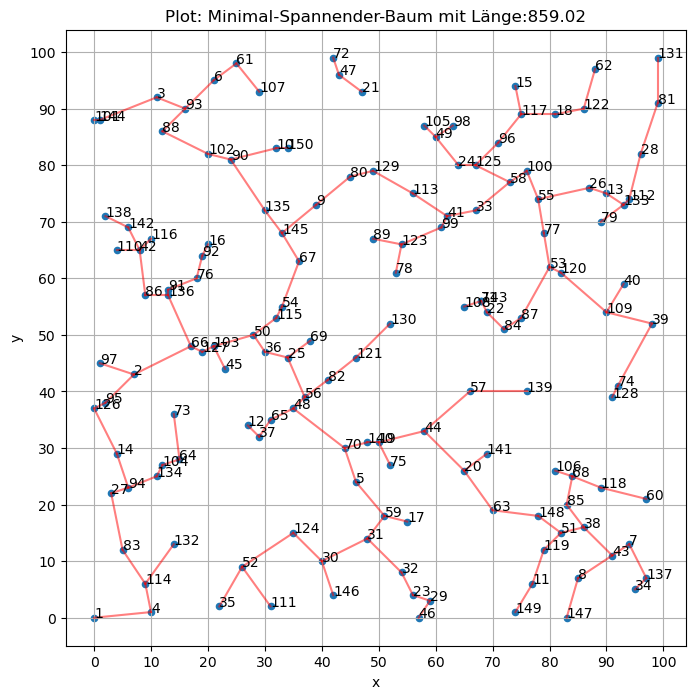

In [73]:
#Visualisierung

plot_minimum_spanning_tree(student_competition_solver(Graph)[0],student_competition_solver(Graph)[1])

**Ergebnis**<br>
- Gesamtlänge von 859.02, und damit sparen 2 Pumpen circa 12 (Einheit) Schlauch ein.
- Eine Pumpe (egal wo) in {21,47,21} und eine in in den resltichen Knoten<br>

In [74]:
def dataframe_to_Graph(df_x):
    # Berechnung der Distanzmatrix
    dist_matrix_x = squareform(pdist(df_x))

    # Erstellung des Netzwerks
    G_x = nx.Graph()

    # Hinzufügen der Knoten
    for i in range(len(df_x)):
        G_x.add_node(i,x=df_x["x"][i], y=df_x["y"][i])

    # Hinzufügen der Kanten mit den Distanzen als Gewicht
    for i in range(len(df_x)):
        for j in range(len(df_x)):
            G_x.add_edge(i, j, weight=dist_matrix_x[i][j])


    return G_x


In [75]:
def plot_minimum_spanning_tree(array_pumpe_1, array_pumpe_2):
    # Erstes DataFrame mit den Indizes aus array_pumpe_1 erstellen
    df1 = df.loc[array_pumpe_1].copy().reset_index(drop=True)
    # Zweites DataFrame mit den Indizes aus array_pumpe_2 erstellen
    df2 = df.loc[array_pumpe_2].copy().reset_index(drop=True)

    Graph_Pumpe1 = dataframe_to_Graph(df1)
    Graph_Pumpe2 = dataframe_to_Graph(df2)

    # Berechnung des minimalen Spannbaums für Pumpe 1
    T_1 = nx.minimum_spanning_tree(Graph_Pumpe1)
    total_length_1 = sum(Graph_Pumpe1[u][v]['weight'] for u, v in T_1.edges())

    # Berechnung des minimalen Spannbaums für Pumpe 2
    T_2 = nx.minimum_spanning_tree(Graph_Pumpe2)
    total_length_2 = sum(Graph_Pumpe2[u][v]['weight'] for u, v in T_2.edges())

    # Scatter-Plot

    plt.figure(figsize=(6, 6))
    plt.scatter(df["x"], df["y"], s=20)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Plot: Minimal-Spannender-Baum mit Länge:" + str(round(total_length_1 + total_length_2, 2)))
    plt.grid(True)

    # Punkte plotten. Index +1, da wir hier mit 0 anfangen zu zählen
    for i, txt in enumerate(df.index):
        plt.annotate(txt + 1, (df["x"][i], df["y"][i]))

    # Zeichnen der Kanten des minimalen Spannbaums für Pumpe 1
    for (u, v) in T_1.edges():
        x1, y1 = Graph_Pumpe1.nodes[u]["x"], Graph_Pumpe1.nodes[u]["y"]
        x2, y2 = Graph_Pumpe1.nodes[v]["x"], Graph_Pumpe1.nodes[v]["y"]
        plt.plot([x1, x2], [y1, y2], 'r-', alpha=0.5)

    # Zeichnen der Kanten des minimalen Spannbaums für Pumpe 2
    for (u, v) in T_2.edges():
        x1, y1 = Graph_Pumpe2.nodes[u]["x"], Graph_Pumpe2.nodes[u]["y"]
        x2, y2 = Graph_Pumpe2.nodes[v]["x"], Graph_Pumpe2.nodes[v]["y"]
        plt.plot([x1, x2], [y1, y2], 'r-', alpha=0.5)

    plt.xticks(range(0, 101, 10))
    plt.yticks(range(0, 101, 10))
    plt.show()